In [15]:
import numpy as np
from alg import *
import cv2

In [16]:
N = [3, 4, 5, 6, 7]
K = [5, 10, 15, 20, 25, 30, 35, 40, 45]
repeat = 10
neighbour = 5
dataset, labels = read_all()

In [17]:
def eigenface():
    avg_mis_of_N = []
    for n in N:
        avg_mis = []
        for k in K:
            k_mis = []
            # 重复多次取平均值
            for _ in range(repeat):
                # 随机选取训练数据
                (train_data, train_label), (test_data, test_label) = random_select_data(dataset, labels, n)
                # 数据降维
                train_data, eigen, mean = Reduction.pca(train_data, k)
                test_data = eigen.T.dot(test_data - mean)
                # 使用knn分类器
                knn = KNN(neighbour)
                knn.fit(train_data, train_label)
                res, mis = knn.predict(test_data, test_label)
                k_mis.append(mis)
            avg_mis.append(sum(k_mis) / len(k_mis))
        avg_mis_of_N.append(avg_mis)
    return avg_mis_of_N

In [18]:
avg_mis_of_N = eigenface()

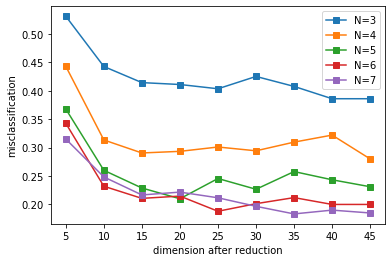

In [19]:
import matplotlib.pyplot as plt
for i, avg_mis in enumerate(avg_mis_of_N):
    plt.plot(K, avg_mis,'s-',label="N="+str(N[i]))
    plt.legend()
plt.xlabel("dimension after reduction")
plt.ylabel("misclassification")
plt.show()

In [7]:
(train_data, train_label), (test_data, test_label) = random_select_data(dataset, labels, 3)
train_data, eigen, mean = Reduction.pca(train_data, 100)
test_data = eigen.T.dot(test_data - mean)

#### 特征脸

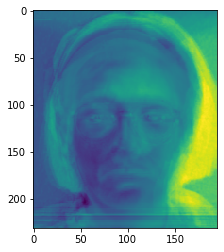

In [8]:
plt.imshow(eigen[:, 0].reshape(231, 195))